![DBAPI](VeritabaniBaglanti.png)

- https://peps.python.org/pep-0249/
- https://www.sqlite.org/download.html
- https://sqlitestudio.pl/
- https://www.connectionstrings.com/

In [1]:
# sqlite a bağlanmak için gerekli kütüphane
import sqlite3

In [3]:
# bağlantı cümlesi ile bağlantı oluşturun
con = sqlite3.connect("./databases/mesajDB.db") # dosyayı veritabanı olarak kullanacağız
dir(con)

['DataError',
 'DatabaseError',
 'Error',
 'IntegrityError',
 'InterfaceError',
 'InternalError',
 'NotSupportedError',
 'OperationalError',
 'ProgrammingError',
 'Warning',
 '__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'backup',
 'close',
 'commit',
 'create_aggregate',
 'create_collation',
 'create_function',
 'cursor',
 'enable_load_extension',
 'execute',
 'executemany',
 'executescript',
 'in_transaction',
 'interrupt',
 'isolation_level',
 'iterdump',
 'load_extension',
 'rollback',
 'row_factory',
 'set_authorizer',
 'set_progress_handler',
 'set_trace_callback',
 'text_factory',
 'total_changes']

In [7]:
# tablo oluşturma
con.execute("""
CREATE TABLE mesaj
(
    Id int,
    Metin nvarchar(100)
)
""")

In [8]:
# tabloyu silmek için
# con.execute("DROP TABLE mesaj")

In [9]:
# kayıt girelim
con.execute("INSERT INTO mesaj VALUES(1,'1. Kayıt')")
con.execute("INSERT INTO mesaj VALUES(2,'2. Kayıt')")
con.execute("INSERT INTO mesaj VALUES(3,'3. Kayıt')")
con.execute("INSERT INTO mesaj VALUES(4,'4. Kayıt')")
con.execute("INSERT INTO mesaj VALUES(5,'5. Kayıt')")

con.commit() # yapılan değişikliklerin onaylanması gerekir.

# con.rollback() # bilinçli olarak yapılanları geri almak.

In [10]:
imlec = con.execute("SELECT * FROM mesaj LIMIT 2")

In [11]:
imlec.description

(('Id', None, None, None, None, None, None),
 ('Metin', None, None, None, None, None, None))

In [12]:
imlec.fetchall() # tüm satır ve kolonları getirir, satırlar liste içerisinde geldi , kolonlar tuple olarak gelir.

[(1, '1. Kayıt'), (2, '2. Kayıt')]

In [13]:
con.close()

### Pandas ile okuma

![Pandas](PandasDF.png)

In [15]:
!pip install pandas

     --------------------------------------- 10.9/10.9 MB 10.5 MB/s eta 0:00:00
  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)


In [16]:
import pandas as pd

In [17]:
import sqlite3

In [18]:
con = sqlite3.connect("./databases/mesajDB.db")

df = pd.read_sql("SELECT * FROM mesaj", con) # dataframe
con.close()

In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
df.head(3) # ilk üç satır gelsin.

,Id,Metin
0,1,1. Kayıt
1,2,2. Kayıt
2,3,3. Kayıt


In [21]:
df.tail(2) # alttan 2 satır gelsin.

,Id,Metin
3,4,4. Kayıt
4,5,5. Kayıt


In [22]:
df.sample(4) # rastgele 4 örnek veri getir.

,Id,Metin
2,3,3. Kayıt
1,2,2. Kayıt
3,4,4. Kayıt
0,1,1. Kayıt


In [23]:
df.query("Id == 4") # ID si 4 olan satırı getir. pandas ın query fonk. ile çalıştırıyorum.

,Id,Metin
3,4,4. Kayıt


In [25]:
df.Metin # sadece Metin kononu değerleri

0    1. Kayıt
1    2. Kayıt
2    3. Kayıt
3    4. Kayıt
4    5. Kayıt
Name: Metin, dtype: object

In [26]:
# iloc ile satır ve sutun sıra numaralarını kullanarak istediğim bölümü getirebilirim
# 2. satır, 0. ve 1. kolon gelsin.
df.iloc[2,[0,1]]

Id              3
Metin    3. Kayıt
Name: 2, dtype: object

In [27]:
df.loc[0:5:2, ["Id", "Metin"]] # 0 ile 5. satırları 2 şet atlayarak getir. IS ve MEtin kolonları gelsin.

,Id,Metin
0,1,1. Kayıt
2,3,3. Kayıt
4,5,5. Kayıt


# Veri Görselleştirme
- matplotlib kütüphanesi bu konuda en temel kütüphanelerdendir.

In [29]:
!pip install matplotlib

  Using cached matplotlib-3.6.2-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-9.3.0-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached contourpy-1.0.6-cp39-cp39-win_amd64.whl (161 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)


In [30]:
from matplotlib import pyplot as plt

In [31]:
x = [1,2,3,4,5,6,7,8,9,10]

In [32]:
import numpy as np

In [33]:
x_array = np.array(x)

In [34]:
y_array2 = x_array ** 2
y_array3 = x_array ** 3

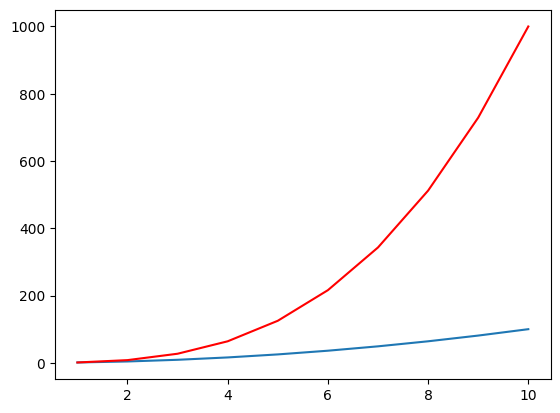

In [35]:
plt.plot(x, y_array2)
plt.plot(x, y_array3, color="red")

plt.show()

![Baglanti](MSSQLveOracleBaglanti.png)

In [36]:
!pip install pyodbc

  Using cached pyodbc-4.0.35-cp39-cp39-win_amd64.whl (66 kB)


In [37]:
import pyodbc

In [38]:
pyodbc.drivers()

['SQL Server',
 'SQL Server Native Client 11.0',
 'ODBC Driver 13 for SQL Server',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server']

In [39]:
con_str = "Driver={ODBC Driver 17 for SQL Server};Server=localhost;Database=AdventureWorks2012;Trusted_Connection=yes;"
con = pyodbc.connect(con_str) # cx_Oracle.connect(...)

In [40]:
imlec = con.execute("SELECT @@version")

In [41]:
imlec.fetchone()

('Microsoft SQL Server 2016 (RTM-GDR) (KB4019088) - 13.0.1742.0 (X64) \n\tJul  5 2017 23:41:17 \n\tCopyright (c) Microsoft Corporation\n\tEnterprise Edition (64-bit) on Windows 10 Education 6.3 <X64> (Build 19045: ) (Hypervisor)\n', )

In [42]:
imlec = con.execute("SELECT Name, ListPrice, Color FROM Production.Product")

In [43]:
imlec.fetchall()

[('Adjustable Race', Decimal('0.0000'), None),
 ('Bearing Ball', Decimal('0.0000'), None),
 ('BB Ball Bearing', Decimal('0.0000'), None),
 ('Headset Ball Bearings', Decimal('0.0000'), None),
 ('Blade', Decimal('0.0000'), None),
 ('LL Crankarm', Decimal('0.0000'), 'Black'),
 ('ML Crankarm', Decimal('0.0000'), 'Black'),
 ('HL Crankarm', Decimal('0.0000'), 'Black'),
 ('Chainring Bolts', Decimal('0.0000'), 'Silver'),
 ('Chainring Nut', Decimal('0.0000'), 'Silver'),
 ('Chainring', Decimal('0.0000'), 'Black'),
 ('Crown Race', Decimal('0.0000'), None),
 ('Chain Stays', Decimal('0.0000'), None),
 ('Decal 1', Decimal('0.0000'), None),
 ('Decal 2', Decimal('0.0000'), None),
 ('Down Tube', Decimal('0.0000'), None),
 ('Mountain End Caps', Decimal('0.0000'), None),
 ('Road End Caps', Decimal('0.0000'), None),
 ('Touring End Caps', Decimal('0.0000'), None),
 ('Fork End', Decimal('0.0000'), None),
 ('Freewheel', Decimal('0.0000'), 'Silver'),
 ('Flat Washer 1', Decimal('0.0000'), None),
 ('Flat Washer

In [44]:
import pandas as pd

df = pd.read_sql("SELECT NAme,ListPrice,Color FROM Production.Product", con)
df.head()

C:\Users\ragip\AppData\Local\Temp\ipykernel_8824\1142020500.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT NAme,ListPrice,Color FROM Production.Product", con)


,NAme,ListPrice,Color
0,Adjustable Race,0.0,None
1,Bearing Ball,0.0,None
2,BB Ball Bearing,0.0,None
3,Headset Ball Bearings,0.0,None
4,Blade,0.0,None


In [45]:
from matplotlib import pyplot as plt

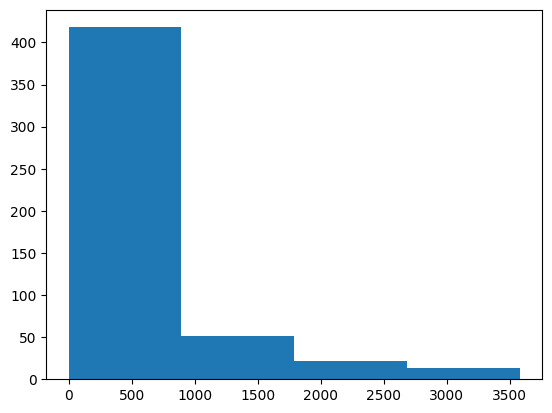

In [47]:
plt.hist(df.ListPrice, bins=4)
plt.show()

In [48]:
con.close()